### 1. Training Word2Vec with Gensim

In [ ]:
import pandas as pd
from tqdm import tqdm

import plotly.io as pio
from matplotlib import pyplot
import plotly.graph_objects as go


from gensim.models import Word2Vec
from sklearn.decomposition import PCA


sentences = [['human', 'interface', 'computer'],
            ['survey', 'user', 'computer', 'system', 'response', 'time'],
            ['eps', 'user', 'interface', 'system'],
            ['system', 'human', 'system', 'eps'],
            ['user', 'response', 'time'],
            ['trees'],
            ['graph', 'trees'],
            ['graph', 'minors', 'trees'],
            ['graph', 'minors', 'survey']]

model = Word2Vec(sentences = sentences, min_count=1)

model.train([["hello", "world"]], total_examples=1, epochs=1)


# print(model.wv['trees'])
# print(w2v_model.wv.similarity('computer','interface'))
# print(model.wv.most_similar('computer', topn=10))

(0, 2)

### 2. Visualize the Vectors

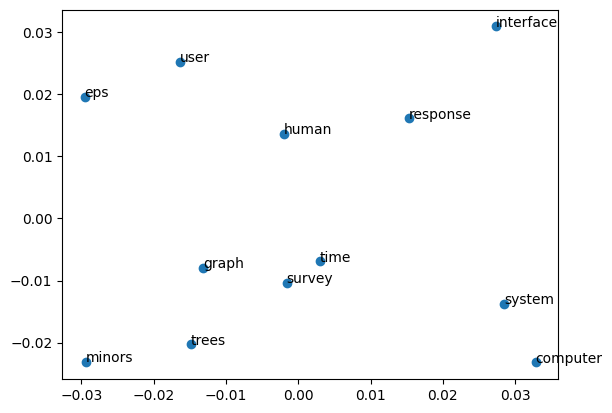

In [ ]:
model = Word2Vec(sentences, min_count=1)

X = [model.wv[word] for word in model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

### 3. Training Word2Vec on Large Dataset

In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec

# print(api.info())
# print(api.info().keys())
# print(api.info()['corpora'].keys())
# print(api.info()['models'].keys())
# print(api.info('text8'))


corpus = api.load("text8")
corpus = [wd for wd in corpus]
corpora = ''
for corp in corpus:
  corpora += ' '.join(corp)

print("Corpus Size :",len(corpora.split(' ')))
print("Vocab Size  :",len(set(corpora.split(' '))))

del corpora

corpus = api.load("text8")
w2v_model = Word2Vec( corpus , min_count = 13000, vector_size = 300, workers = 10, window = 3,
                     sg = 0, hs = 0,  epochs = 5) #, max_vocab_size = 5)

Corpus Size : 17003507
Vocab Size  : 255310


### 4. Visualize the Trained Vectors

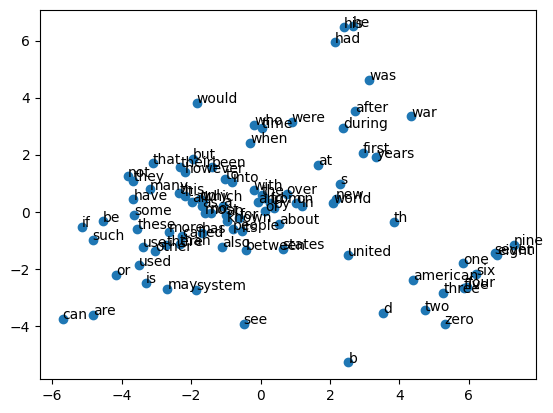

In [ ]:
X = [w2v_model.wv[word] for word in w2v_model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])

words = list(w2v_model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show()

### 5. Training Word2Vec in Text8

In [ ]:
corpus = api.load("text8")
corpus = [wd for wd in corpus]
corpora = ''
for corp in corpus:
  corpora += ' '.join(corp)

print("Corpus Size :",len(corpora.split(' ')))
print("Vocab Size  :",len(set(corpora.split(' '))))

del corpora

corpus = api.load("text8")
w2v_model = Word2Vec( corpus , min_count = 1000, vector_size = 300, workers = 10, window = 3,
                     sg = 0, hs = 0,  epochs = 5) #, max_vocab_size = 5)

Corpus Size : 17003507
Vocab Size  : 255310


### 6. Plotting Word Vectors

In [ ]:
X     = [w2v_model.wv[word] for word in w2v_model.wv.index_to_key]
words = list(w2v_model.wv.index_to_key)

pca = PCA(n_components=2)
result = pca.fit_transform(X)

data = {'x' : result[:, 0], 'y' : result[:,1], 'label' : words}
df = pd.DataFrame(data)

scatter = go.Scatter(
    x = result[:, 0],
    y = result[:, 1],
    mode='markers+text',
    text = words,
    textposition='top center',
    marker=dict(
        size=5,
        color='rgba(152, 0, 0, .8)',
    )
)

layout = go.Layout(
    title='Word Vector Distribution',
    xaxis=dict(title='Dimension 1'),
    yaxis=dict(title='Dimension 2'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=[scatter], layout=layout)

# Show interactive plot in Jupyter Notebook
pio.show(fig)

### 7. Saving a trained Word2Vec

In [ ]:
w2v_model.save('word2vec_text8')
model = Word2Vec.load('word2vec_text8')

### 8. Using Pretrained Large Models

In [ ]:
import gensim.downloader as api
import gensim

print(list(gensim.downloader.info()['models'].keys()))

word_vectors = api.load("word2vec-google-news-300")

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
word_vectors.most_similar('Delhi')[:3]

[('Kolkata', 0.7663769125938416),
 ('Mumbai', 0.7306069731712341),
 ('Lucknow', 0.7277829647064209)]

In [ ]:
word_vectors.most_similar('war')[:3]

[('wars', 0.748465895652771),
 ('War', 0.6410670280456543),
 ('invasion', 0.5892110466957092)]

In [ ]:
vec = word_vectors['king'] - word_vectors['man'] + word_vectors['woman']
print(word_vectors.most_similar([vec])[:3])

vec = word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)
print(vec)

vec = word_vectors['Paris'] - word_vectors['France'] + word_vectors['Italy']
print(word_vectors.most_similar([vec])[:3])

[('king', 0.8449392318725586), ('queen', 0.7300517559051514), ('monarch', 0.645466148853302)]
[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951)]
[('Milan', 0.7251641750335693), ('Rome', 0.7073156237602234), ('Italy', 0.6847635507583618)]


### 9. Downloading Different Corpuses to Work with

In [ ]:
corporas = [i for i in api.info()['corpora'].keys()][:-2]

for corpora in corporas:
  print(corpora)
  corpus = api.load(corpora)

  # del corpus

semeval-2016-2017-task3-subtaskBC
[==================================================] 100.1% 6.1/6.0MB downloaded
semeval-2016-2017-task3-subtaskA-unannotated
[==================================================] 100.0% 223.5/223.5MB downloaded
patent-2017
 Part 1/2 [==================================================] 100.0% 1950.0/1950.0MB downloaded
 Part 2/2 [=================================================-] 99.2% 986.1/994.2MB downloaded
quora-duplicate-questions
[==================================================] 100.0% 20.7/20.7MB downloaded
wiki-english-20171001
 Part 1/4 [=================================================-] 99.9% 1948.5/1950.0MB downloaded
 Part 2/4 [==================================================] 100.0% 1950.0/1950.0MB downloaded
 Part 3/4 [==================================================] 100.0% 1950.0/1950.0MB downloaded
 Part 4/4 [=================================================-] 100.0% 364.1/364.2MB downloaded
text8
fake-news
[===================